# YouTube Trending Video US

### Dataset 

* Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the IN, US, GB, DE, CA, FR, RU, BR, MX, KR, and JP regions (India, USA, Great Britain, Germany, Canada, France, Russia, Brazil, Mexico, South Korea, and, Japan respectively), with up to 200 listed trending videos per day.

Link to the dataset - https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/data 

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# Data viz packages
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
youtube_data_us = pd.read_csv("dataset/US_youtube_trending_data.csv")
youtube_data_us.head()    # 251987 rows 16 columns

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


Data Understanding
---


In [4]:
youtube_data_us.info()
youtube_data_us.isnull().sum()   #description  has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251987 entries, 0 to 251986
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           251987 non-null  object
 1   title              251987 non-null  object
 2   publishedAt        251987 non-null  object
 3   channelId          251987 non-null  object
 4   channelTitle       251987 non-null  object
 5   categoryId         251987 non-null  int64 
 6   trending_date      251987 non-null  object
 7   tags               251987 non-null  object
 8   view_count         251987 non-null  int64 
 9   likes              251987 non-null  int64 
 10  dislikes           251987 non-null  int64 
 11  comment_count      251987 non-null  int64 
 12  thumbnail_link     251987 non-null  object
 13  comments_disabled  251987 non-null  bool  
 14  ratings_disabled   251987 non-null  bool  
 15  description        247512 non-null  object
dtypes: bool(2), int64(5)

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4475
dtype: int64

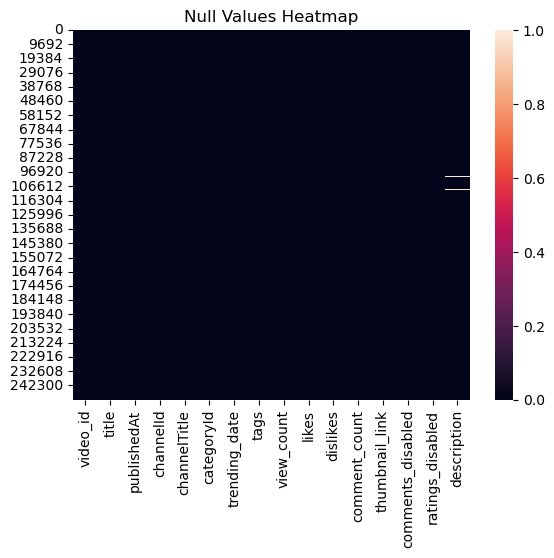

In [5]:
sns.heatmap(youtube_data_us.isnull())
plt.title('Null Values Heatmap')
plt.show()

DATA CLEANING
---

In [6]:
# Removing NULL values on the description column 

# df = youtube_data_us[youtube_data_us['description'].isnull()]
# df # 4475 rows

# replacing na values in college with No college
youtube_data_us["description"].fillna("[None]", inplace = True)
youtube_data_us.isnull().sum() 


video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [ ]:
# view_count, likes ,dislikes, comment_count

# Change the data types from object to numeric
# numeric_cols = ["view_count","likes","dislikes","comment_count"]
# youtube_data_us[numeric_cols] = youtube_data_us[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

Data Instancing

Both the trending_date and publishedAt columns have dates, but in different format, we will clean the data such that both columns include datatime.date objects.

In [7]:
# publishedAt trending_date
from dateutil import parser 

# change Publish day = 2024-01-19T23:44:36Z into datetime
youtube_data_us['publishedAt'] = youtube_data_us['publishedAt'].apply(lambda x: parser.parse(x)) 
# youtube_data_us['pushblishDayName'] = youtube_data_us['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [8]:
# # Convert the 'publishedAt' column to datetime format
youtube_data_us['publishedAt'] = pd.to_datetime(youtube_data_us['publishedAt'])

# using the dt accessor to creates new columns for each component.
youtube_data_us['published_day'] = youtube_data_us['publishedAt'].dt.day_name()
youtube_data_us['published_month'] = youtube_data_us['publishedAt'].dt.month_name()
youtube_data_us['published_year'] = youtube_data_us['publishedAt'].dt.year
youtube_data_us['published_time'] = youtube_data_us['publishedAt'].dt.time

In [9]:
youtube_data_us['trending_date'] = youtube_data_us['trending_date'].apply(lambda x: parser.parse(x)) 
# youtube_data_us['trending_date_day'] = youtube_data_us['trending_date'].apply(lambda x: x.strftime("%A")) 

In [10]:
# # Convert the 'publishedAt' column to datetime format
youtube_data_us['trending_date'] = pd.to_datetime(youtube_data_us['trending_date'])

# using the dt accessor to creates new columns for each component.
youtube_data_us['trending_day'] = youtube_data_us['trending_date'].dt.day_name()
youtube_data_us['trending_month'] = youtube_data_us['trending_date'].dt.month_name()
youtube_data_us['trending_year'] = youtube_data_us['trending_date'].dt.year
youtube_data_us['trending_time'] = youtube_data_us['trending_date'].dt.time

In [11]:
youtube_data_us.sample(7)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,published_day,published_month,published_year,published_time,trending_day,trending_month,trending_year,trending_time
113313,aWzlQ2N6qqg,Marvel Studios' Doctor Strange in the Multiver...,2022-02-13 23:12:44+00:00,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-02-25 00:00:00+00:00,marvel|comics,41487459,1846738,...,False,Enter a new dimension of Strange. Watch the of...,Sunday,February,2022,23:12:44,Friday,February,2022,00:00:00
124157,elk0WSeVzOc,Minecraft but MrBeast Custom Hearts,2022-04-14 20:29:53+00:00,UCMYevdNaWmPbuIB0PdPc9ZQ,ZMDE Gaming,20,2022-04-20 00:00:00+00:00,zmde|zmde animations|minecraft|minecraft but|n...,991629,17162,...,False,Subscribe for new videos every week! https://w...,Thursday,April,2022,20:29:53,Wednesday,April,2022,00:00:00
40233,TUwNC1wcwxM,"I Bought an AS-IS $90,000 Mercedes AMG at Auct...",2021-03-02 19:00:05+00:00,UCtn2hU9HKYQAgDtwrhux7Sw,Samcrac,2,2021-03-05 00:00:00+00:00,exhaust|install|diy|armytrix|custom|modified|m...,554758,24664,...,False,Armor Shield IX Ceramic Coating Kit: https://b...,Tuesday,March,2021,19:00:05,Friday,March,2021,00:00:00
179828,PKvKOJZcT-s,Surviving Winter In a Ghost Town!,2023-01-22 21:00:07+00:00,UCEjBDKfrqQI4TgzT9YLNT8g,Ghost Town Living,22,2023-01-24 00:00:00+00:00,[None],346336,22426,...,False,To get 5 free travel packs of AG1 and a year s...,Sunday,January,2023,21:00:07,Tuesday,January,2023,00:00:00
217627,uL2L8zwpd3o,Gregory Sun & Moon Save Freddy | Security Malw...,2023-08-01 18:30:07+00:00,UCYL0au6V77nHEhVP9kUMwlQ,Cougar macdowall Va,1,2023-08-03 00:00:00+00:00,animation|asdf|glamrock freddy|glamrock chica|...,603838,20589,...,False,"Gregory along with Sun & Moon Monty, Chica, an...",Tuesday,August,2023,18:30:07,Thursday,August,2023,00:00:00
21469,qvXLtsBF9us,NBA YoungBoy - Let Them Shots Off [Official Vi...,2020-11-25 23:00:20+00:00,UCFPqB2Z3j5i62ZAbw1jBQvQ,YoungBoy Never Broke Again,10,2020-11-29 00:00:00+00:00,YoungBoy Never Broke Again|Youngboy Slime Ment...,653989,17459,...,False,YoungBoy Never Broke Again – Let Them Shots O...,Wednesday,November,2020,23:00:20,Sunday,November,2020,00:00:00
217368,KRRydiq6pvA,"Lil Poppa, NoCap - Let God Choose (Official Mu...",2023-07-26 17:00:14+00:00,UC6A6HellIIFY6mV2VLr4ijA,LilPoppaVEVO,10,2023-08-01 00:00:00+00:00,Lil|Poppa|Let|God|Choose|CMG/Interscope|Record...,462553,19948,...,False,"Stream 'Half Man, Half Vamp' Here: http://LilP...",Wednesday,July,2023,17:00:14,Tuesday,August,2023,00:00:00


In [12]:
# List of YouTube Video Category IDs
youtube_data_us['categoryId'].unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29])

Tag Splitting

Now lets clean up the tags column by separating tags into a list instead of one long string.

In [13]:
def clean_tags(tag):
    if tag == '[None]': return []
    return tag.lower().replace('"','').split('|')

In [14]:
youtube_data_us['tags'] = youtube_data_us['tags'].apply(clean_tags)
youtube_data_us.head(n=2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,published_day,published_month,published_year,published_time,trending_day,trending_month,trending_year,trending_time
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Tuesday,August,2020,19:20:14,Wednesday,August,2020,00:00:00
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,"[apex legends, apex legends characters, new ap...",2381688,146739,...,False,"While running her own modding shop, Ramya Pare...",Tuesday,August,2020,17:00:10,Wednesday,August,2020,00:00:00


Natural Language processing for Title
---

* This time we will clean the video title and keep only the nececary words. So that, we can better analys certain keywords being used in the titles.

In [23]:
import nltk     #Natural Language Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ingridlewah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        # Remove money amount, non-alphanumeric tokens, or stopwords
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

youtube_data_us['title_cl'] = youtube_data_us['title'].apply(clean_titles)

#Lets check for result
youtube_data_us.head(n=2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,description,published_day,published_month,published_year,published_time,trending_day,trending_month,trending_year,trending_time,title_cl
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,...,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Tuesday,August,2020,19:20:14,Wednesday,August,2020,00:00:00,asked
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,"[apex legends, apex legends characters, new ap...",2381688,146739,...,"While running her own modding shop, Ramya Pare...",Tuesday,August,2020,17:00:10,Wednesday,August,2020,00:00:00,apex legends stories outlands


EDA
---

In [51]:
youtube_data_us.publishedAt.min() #Timestamp('2020-08-03 21:51:14+0000', tz='tzutc()')
youtube_data_us.publishedAt.max()  #Timestamp('2024-01-21 19:14:08+0000', tz='tzutc()')

Timestamp('2024-01-21 19:14:08+0000', tz='tzutc()')

In [25]:
df_2020 = youtube_data_us[youtube_data_us['published_year'] == 2020 ]
# df_2020.shape #(28732, 24)
df_2020.describe()

,categoryId,view_count,likes,dislikes,comment_count,published_year,trending_year
count,28732.000000,2.873200e+04,2.873200e+04,28732.000000,2.873200e+04,28732.0,28732.000000
mean,18.403139,2.745173e+06,1.585114e+05,3826.578484,1.768073e+04,2020.0,2020.039538
std,7.251993,6.881823e+06,4.787645e+05,19752.415966,1.335513e+05,0.0,0.194874
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2020.0,2020.000000
25%,10.000000,5.141335e+05,2.031875e+04,387.000000,1.973000e+03,2020.0,2020.000000
50%,20.000000,1.080212e+06,5.158150e+04,926.000000,4.441500e+03,2020.0,2020.000000
75%,24.000000,2.486937e+06,1.355472e+05,2651.000000,1.104200e+04,2020.0,2020.000000
max,29.000000,2.326492e+08,1.573553e+07,879354.000000,6.065230e+06,2020.0,2021.000000


In [123]:
# TOP 10 VIDEOS WITH THE HIGHEST LIKES
top_10_videos_by_likes = df_2020.nlargest(10, 'likes')
print("Top 10 Videos by Likes:")
top_10_videos_by_likes[['title', 'likes']]

Top 10 Videos by Likes:


,title,likes
3358,BTS (방탄소년단) 'Dynamite' Official MV,15735533
3137,BTS (방탄소년단) 'Dynamite' Official MV,15460822
2894,BTS (방탄소년단) 'Dynamite' Official MV,15246496
2653,BTS (방탄소년단) 'Dynamite' Official MV,14994034
2418,BTS (방탄소년단) 'Dynamite' Official MV,14678048
2201,BTS (방탄소년단) 'Dynamite' Official MV,14134480
4980,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,11795670
4766,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,11645386
4537,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,11474597
21367,BTS (방탄소년단) 'Life Goes On' Official MV,11405030


In [64]:
# What video had the highest views in the year 2020
# viewsdf = df_2020[df_2020['view_count'] >= 2000000]

viewsdf = df_2020.groupby('channelTitle')['view_count'].max().sort_values(ascending= False)[:20]
viewsdf


channelTitle
Big Hit Labels         232649205
BLACKPINK              184778248
Cardi B                 98442414
JYP Entertainment       74991178
The Pixel Kingdom       73728043
Bad Bunny               69345473
RicardoMontanerVEVO     67420953
BlackEyedPeasVEVO       61451597
JustinBieberVEVO        57463872
SMTOWN                  56531571
Apple                   53600621
Desi Music Factory      50524864
ArianaGrandeVevo        47606296
Fox News                46246802
Ozuna                   45893190
DrakeVEVO               45086708
Zee Music Company       44649281
BillieEilishVEVO        43967710
DJKhaledVEVO            43394819
MileyCyrusVEVO          42667486
Name: view_count, dtype: int64

In [70]:
# 2020 Channels with the highest uploads 
df_2020['channelTitle'].value_counts()[:20]

channelTitle
NFL                               297
NBA                               218
MrBeast Gaming                    168
James Charles                     140
MrBeast                           138
ESPN                              126
SSSniperWolf                      125
Saturday Night Live               111
Dude Perfect                      111
Champions League on CBS Sports    110
Dixie D'Amelio                    110
NBC Sports                        105
The Try Guys                       88
YoungBoy Never Broke Again         83
SpaceX                             82
Big Hit Labels                     79
Apex Legends                       79
DEATH BATTLE!                      79
beIN SPORTS USA                    79
BLACKPINK                          76
Name: count, dtype: int64

Channel Frequencies

* Visualizing the chanels with the largest number of trending videos. 

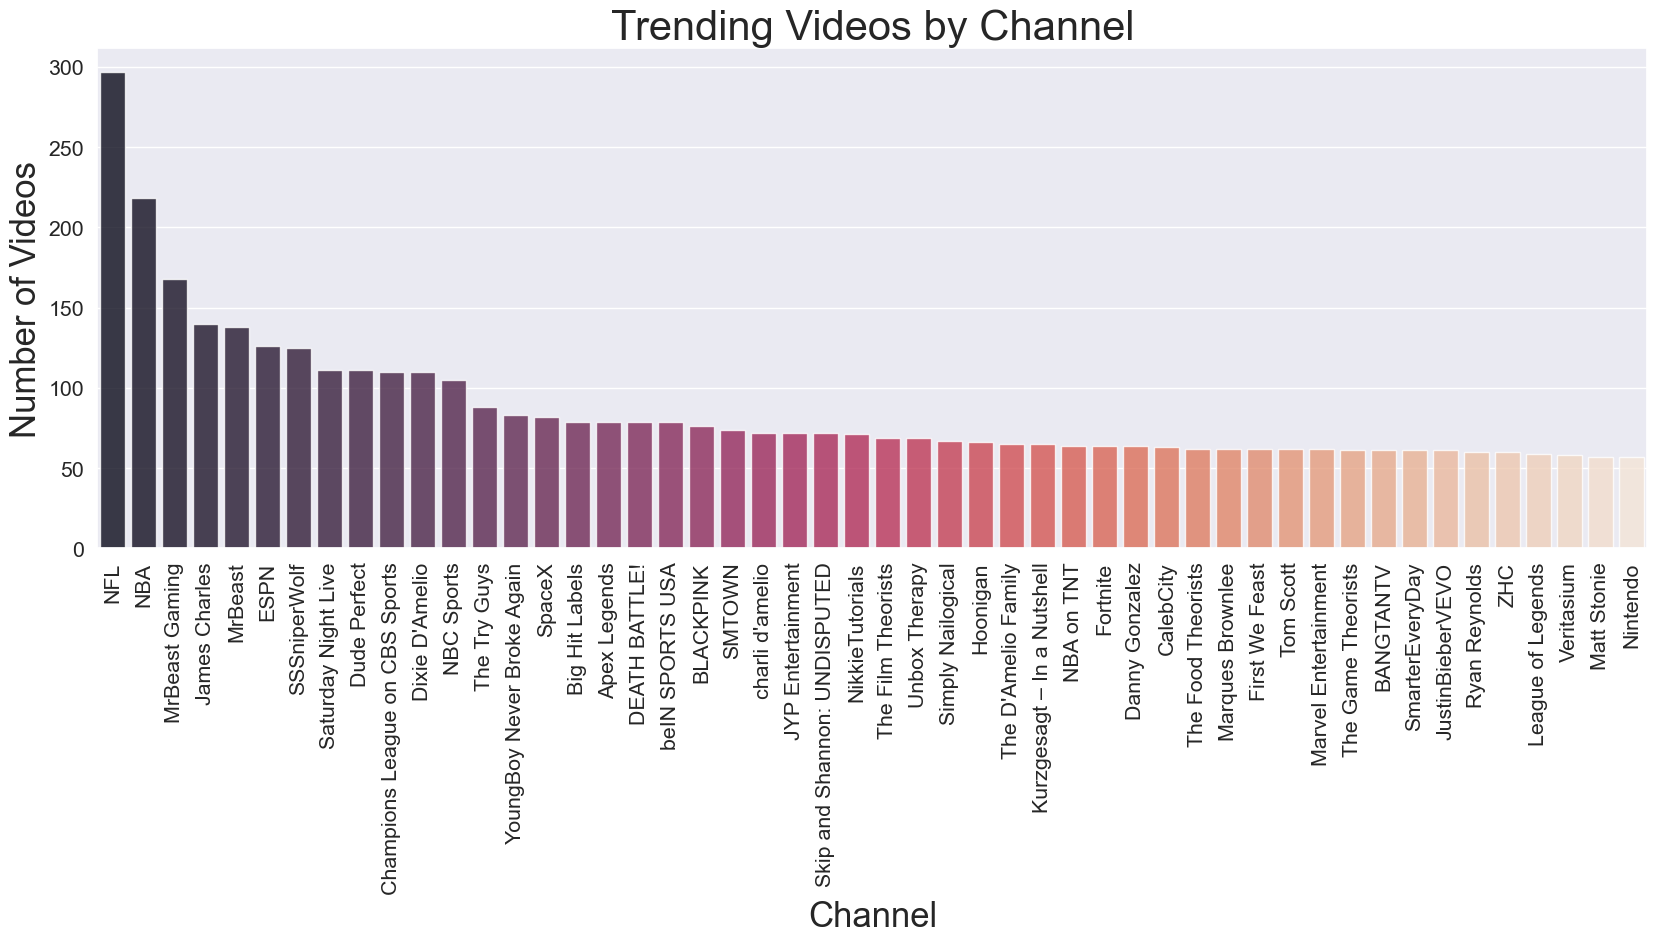

In [35]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = df_2020['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Trending Videos by Channel', fontsize=30)
plt.show()

Catagory ID Mapping

* We will replace the category id with the corresponding category title

In [ ]:
# what YouTube Video Category ID has the highest views and uploaded videos

''' [22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29]
1	Film & Animation
2	Autos & Vehicles
10	Music
15	Pets & Animals
17	Sports
19	Travel & Events
20	Gaming
22	People & Blogs
23	Comedy
24	Entertainment
25	News & Politics
26	Howto & Style
27	Education
28	Science & Technology
29	Nonprofits & Activism
'''

df_2020['categoryId'].value_counts()

In [32]:
df_2020.loc[df_2020['categoryId']==10, 'videoCategory'] = 'Music'
df_2020.loc[df_2020['categoryId']==24, 'videoCategory'] = 'Entertainment'
df_2020.loc[df_2020['categoryId']==17, 'videoCategory'] = 'Sports'
df_2020.loc[df_2020['categoryId']==20, 'videoCategory'] = 'Gaming'
df_2020.loc[df_2020['categoryId']==22, 'videoCategory'] = 'People & Blogs'
df_2020.loc[df_2020['categoryId']==23, 'videoCategory'] = 'Comedy'
df_2020.loc[df_2020['categoryId']==26, 'videoCategory'] = 'How to & Style'
df_2020.loc[df_2020['categoryId']==28, 'videoCategory'] = 'Science & Technology'
df_2020.loc[df_2020['categoryId']==1, 'videoCategory'] = 'Film & Animation'
df_2020.loc[df_2020['categoryId']==25, 'videoCategory'] = 'News & Politics'
df_2020.loc[df_2020['categoryId']==27, 'videoCategory'] = 'Education'
df_2020.loc[df_2020['categoryId']==2, 'videoCategory'] = 'Autos & Vehicles'
df_2020.loc[df_2020['categoryId']==15, 'videoCategory'] = 'Pets & Animals'
df_2020.loc[df_2020['categoryId']==19, 'videoCategory'] = 'Travel & Events'
df_2020.loc[df_2020['categoryId']==29, 'videoCategory'] = 'Nonprofits & Activism'


/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_64480/2312355386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.loc[df_2020['categoryId']==10, 'videoCategory'] = 'Music'


In [33]:
# df_2020.loc[df_2020['categoryId']==28]
df_2020['videoCategory'].value_counts()

videoCategory
Music                    6446
Entertainment            5549
Sports                   3401
Gaming                   2723
People & Blogs           2384
Comedy                   1740
How to & Style           1373
Science & Technology     1346
Film & Animation         1127
News & Politics          1092
Education                 667
Autos & Vehicles          574
Pets & Animals            183
Travel & Events           102
Nonprofits & Activism      25
Name: count, dtype: int64

Video Catagories

* Here we visualize what catagory of trending videos are most and least common by looking at the frequencies of video categories.

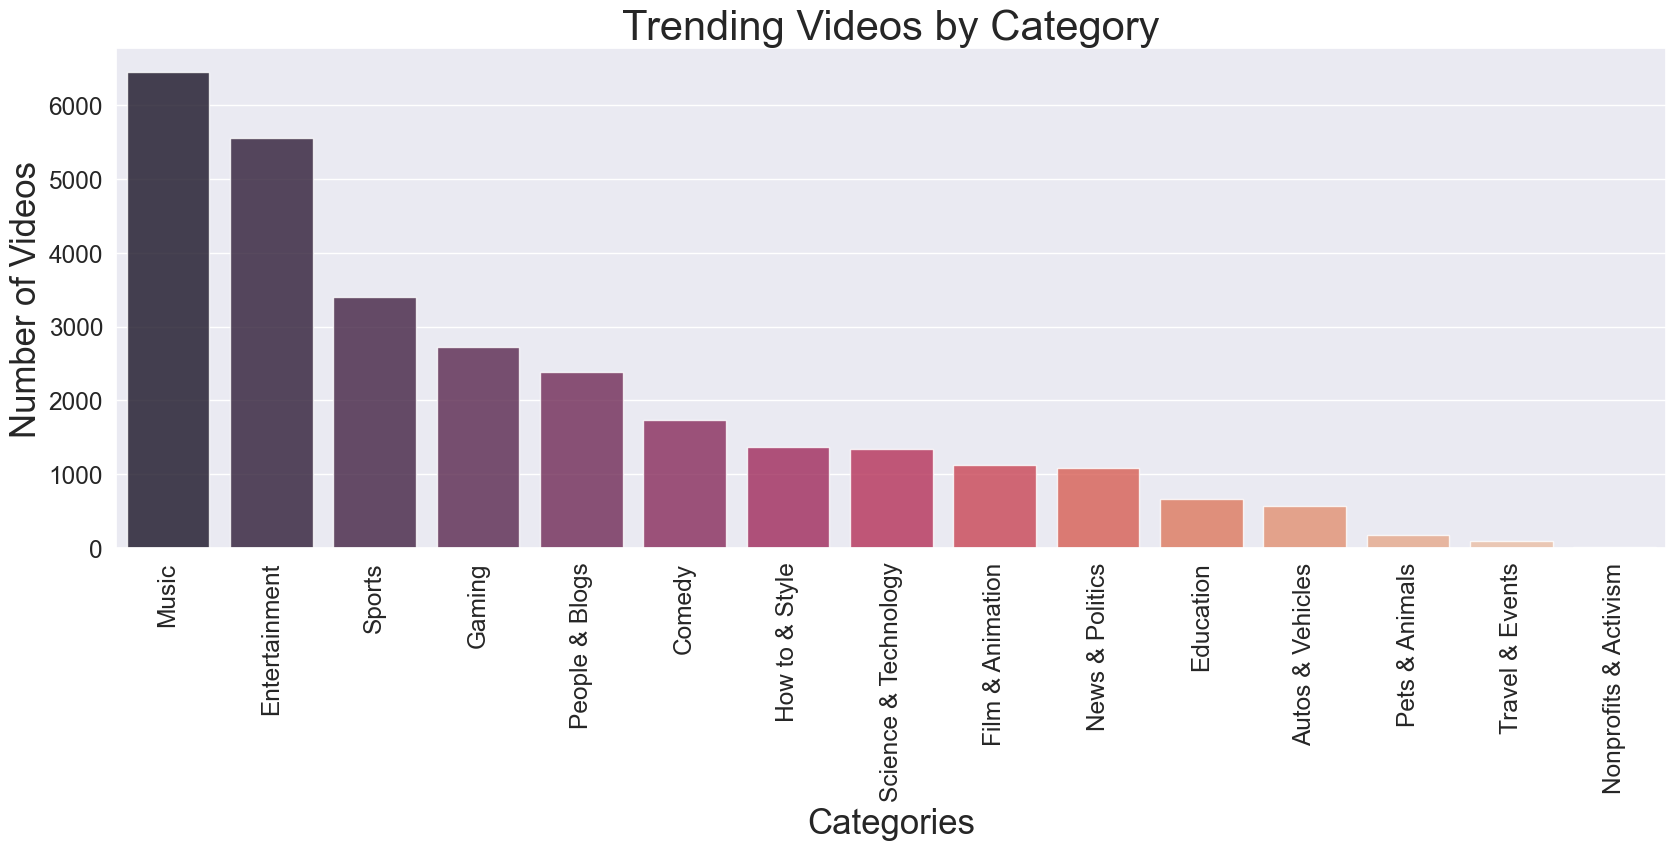

In [34]:
# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.6)

categories = df_2020['videoCategory'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="rocket")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Trending Videos by Category', fontsize=30)
plt.show()

Correlation Heatmap
---
* Correlation Between Numerical Values

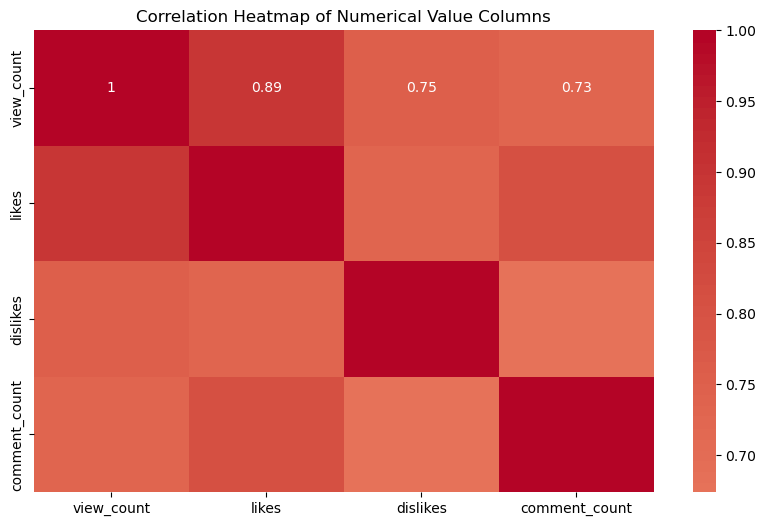

In [21]:
# Select numerical columns
numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = df_2020[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

Title Word Choice
---

* Here we will find outwhat words are mostly used in video titles(Year 2020) by counting how many the same words has been used and folow on after that first lets find them.

In [27]:
import collections
from collections import Counter

In [28]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df_2020['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

/Users/ingridlewah/opt/anaconda3/envs/youtube/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


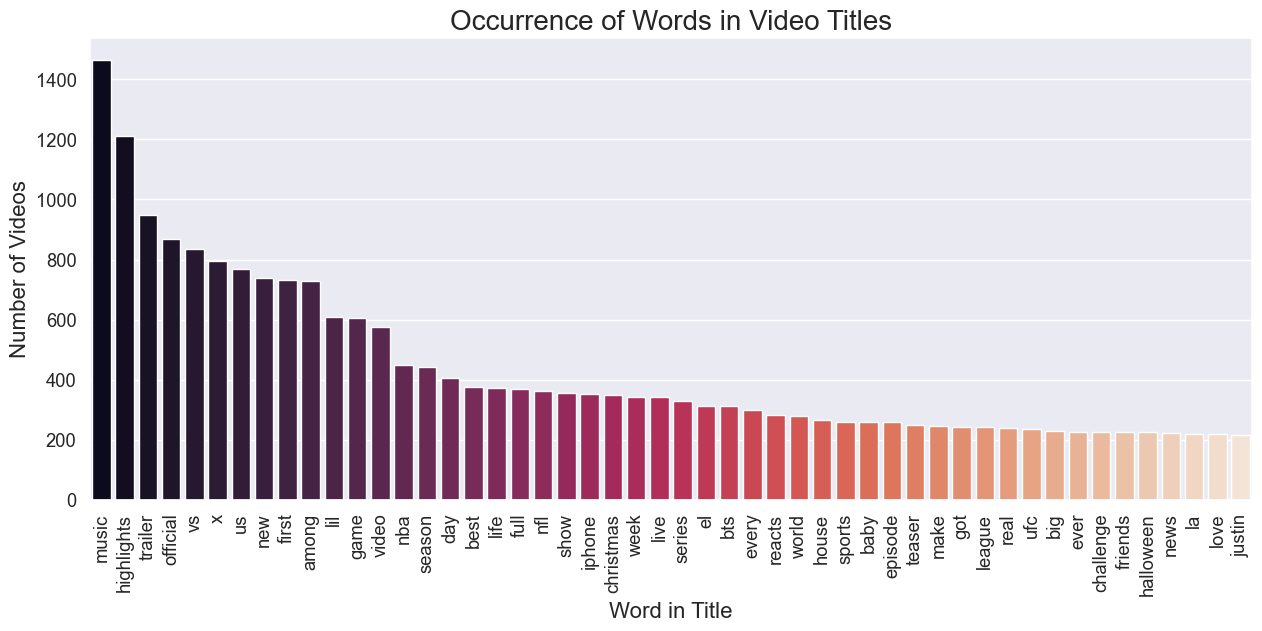

In [30]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Occurrence of Words in Video Titles', fontsize=20)
plt.show()

Q. Does the number of uploadd videos equate to view counts , likes , comments etc 